In [193]:
import pandas as pd
import numpy as np
from numpy import *

from scipy import stats

df1 = pd.read_csv('climate_change_1.txt')
df2 = pd.read_csv('climate_change_2.txt')

# split the data into training data and test data
data_split = 2006
df1_train = df1[df1['Year'] <= data_split]
df1_test = df1[df1['Year'] > data_split]
df2_train = df2[df2['Year'] <= data_split]
df2_test = df2[df2['Year'] > data_split]


# distingush the data as label
df1_train_temp = df1_train['Temp']
df1_test_temp = df1_test['Temp']
df2_train_temp = df2_train['Temp']
df2_test_temp = df2_test['Temp']
length_train1 = len(df1_train_temp)
length_test1 = len(df1_test_temp)
length_train2 = len(df2_train_temp)
length_test2 = len(df2_test_temp)


# distingush the data as feature
df1_train_x = (df1_train.loc[:,'MEI':'Aerosols'])
df1_train_x.insert(0, 'theta0', np.ones(length_train1))
df1_test_x = df1_test.loc[:,'MEI':'Aerosols']
df1_test_x.insert(0, 'theta0', np.ones(length_test1))

df2_train_x = df2_train.loc[:,'MEI':'NO']
df2_train_x.insert(0, 'theta0', np.ones(length_train2))
df2_test_x = df2_test.loc[:,'MEI':'NO']
df2_test_x.insert(0, 'theta0', np.ones(length_test2))


#function closed_form_1()
def closed_form_1(x,y):
    xTx = mat(x).T @ mat(x)
    xTy = mat(x).T @ mat(y).T
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    return xTx.I @ xTy


theta1 = closed_form_1(df1_train_x, df1_train_temp)
print("The estimate of Theta of climate_change_1 is \n", theta1, "\n-----------")
theta2 = closed_form_1(df2_train_x, df2_train_temp)
print("The estimate of Theta of climate_change_2 is \n", theta2, "\n-----------")


# y = ax + b and in this case y = x @ theta 
#function to calculate R square
def R_2(x, y, theta_):
    n = len(y)
    f = reshape(np.array(mat(x) @ theta_), n)
    y = np.array(y)
    y_ = np.ones(n) * sum(y) / n
    ssr = sum((f - y_) ** 2)
    sse = sum((y - f) ** 2)
    sst = ssr + sse
    return ssr/sst


R_2_train1 = R_2(df1_train_x, df1_train_temp, theta1)
R_2_test1 = R_2(df1_test_x, df1_test_temp, theta1)
print("R square of train set 1 is", R_2_train1)
print("R square of test set 1 is", R_2_test1)

R_2_train2 = R_2(df2_train_x, df2_train_temp, theta2)
R_2_test2 = R_2(df2_test_x, df2_test_temp, theta2)
print("R square of train set 2 is", R_2_train2)
print("R square of test set 2 is", R_2_test2)
print("-----------")

# write a t-test to do the significance test
def t_test(x,y,theta_,p):
    n = len(y)
    f = reshape(np.array(mat(x) @ theta_),n)
    y = np.array(y)
    xTx = mat(x).T @ mat(x)
    #a, b = np.linalg.eig(xTx) # k = max(a) / min(a)
    xTxI = xTx.I
    xTxI = np.array(xTxI)
    p1=p+1
    c=np.zeros(p1)
    for jj in range(p1):
        c[jj] = xTxI[jj][jj]
    sse = sum((y - f) ** 2)
    sigma_h = sqrt(sse/(n-p1))
    t = np.zeros(p1)
    pv = np.zeros(p1)
    pv1 = np.zeros(p1)
    for i in range(p1):
        t[i] = theta_[i] / sigma_h / sqrt(c[i])
        pv[i] = 2 *(stats.t.sf(np.abs(t[i]),n-p1)) 
        #pv1[i]= 2*(1-stats.t.cdf(np.abs(t[i]),n-p1)) #just make a validation, it means the same with the last line
        #The former mistake is from the absolute of t value
    return t, pv, np.linalg.matrix_rank(xTx) #pv1

test1 = t_test(df1_train_x, df1_train_temp,theta1,8)
print("For climate_change_1: \n", "t value is: \n", test1[0], "\n p value is: \n", test1[1], "\n rank is: \n",test1[2],"\n-----------")
test2 = t_test(df2_train_x, df2_train_temp,theta2,9)
print("For climate_change_2: \n", "t value is: \n", test2[0], "\n p value is: \n", test2[1], "\n rank is: \n",test2[2],"\n-----------")



The estimate of Theta of climate_change_1 is 
 [[-124.59]
 [   0.06]
 [   0.01]
 [   0.  ]
 [  -0.02]
 [  -0.01]
 [   0.  ]
 [   0.09]
 [  -1.54]] 
-----------
The estimate of Theta of climate_change_2 is 
 [[-131.23]
 [   0.06]
 [   0.01]
 [  -0.01]
 [  -0.02]
 [  -0.01]
 [   0.  ]
 [   0.09]
 [  -1.54]
 [   6.61]] 
-----------
R square of train set 1 is 0.750893277187922
R square of test set 1 is 0.21622556651959746
R square of train set 2 is 0.7207151931204864
R square of test set 2 is 0.22956694401085823
-----------
For climate_change_1: 
 t value is: 
 [-6.27  9.92  2.83  0.24 -1.93 -4.08  3.76  6.31 -7.21] 
 p value is: 
 [0.   0.   0.01 0.81 0.05 0.   0.   0.   0.  ] 
 rank is: 
 9 
-----------
For climate_change_2: 
 t value is: 
 [-0.    8.8   2.51 -0.   -1.71 -3.62  3.33  5.6  -6.39  0.  ] 
 p value is: 
 [1.   0.   0.01 1.   0.09 0.   0.   0.   0.   1.  ] 
 rank is: 
 9 
-----------


Problem 1 question 2:
    
   The function is： y = ax + b and in this case y = x @ theta 

Problem 1 question 3:

    1,2,5,6,7,8 are both significant, they are MEI,CO2,CFC-11,CFC-12,TSI,Aerosols

Problem 1 question 4:

    For climate_change_2: The p value of the last parameter is larger than 0.05, so we cannot reject the null hypothesis. The consequene is that we cannot use the closed_form_1, and it results from the multicollinearity.
        There are two necessary conditions and one less important condition:
        1.XTX is inversible, i.e. the det of XTX is not equal to zero.
        2.The rank of matrix XTX should equal to p+1. where p is the parameter in model. In that case, the climate_change_2 data has a rank 9 which is smaller that p+1=10, so there exists multicollinearity.
        3.An important index to measure the severity of multicollinearity, the condition number k of xTx. k (XTX) is the ratio of the maximum eigenvalue to the minimum eigenvalue of the square matrix XTX. The condition number characterizes the difference in the eigenvalues of XTX. K <100 indicates that the degree of multicollinearity is small, 100 <k <1000 indicates that there is a medium layer or strong multicollinearity, and k> 1000 indicates that a serious Multicollinearity. But that condition is not necessary.
   

Problem 2 question 1：

please see the graph in github for final format.
linear model with L1 regularization： $$C(L1)=∑^n|yi−yi^ˆ|$$

linear model with L2 regularization： $$C(L2)=∑^n(yi−yi^ˆ)^2$$

In [75]:
def closed_form_2(x, y, lamda):
    I = np.identity(x.shape[1])
    xTx1 = mat(x).T @ mat(x) + lamda * I
    xTy = mat(x).T @ mat(y).T
    return xTx1.I @ xTy

theta1_r = closed_form_2(df1_train_x, df1_train_temp,3)
print("The regulation estimate of Theta of climate_change_1 is \n", theta1_r, "\n-----------")
theta2_r = closed_form_2(df2_train_x, df2_train_temp,3)
print("The regulation estimate of Theta of climate_change_2 is \n", theta2_r, "\n-----------")

R_2_train1_r = R_2(df1_train_x, df1_train_temp, theta1_r)
R_2_test1_r = R_2(df1_test_x, df1_test_temp, theta1_r)
print("R square of regulation train set 1 is", R_2_train1_r)
print("R square of regulation test set 1 is", R_2_test1_r)

R_2_train2_r = R_2(df2_train_x, df2_train_temp, theta2_r)
R_2_test2_r = R_2(df2_test_x, df2_test_temp, theta2_r)
print("R square of regulation train set 2 is", R_2_train2_r)
print("R square of regulation test set 2 is", R_2_test2_r)
print("-----------")

The regulation estimate of Theta of climate_change_1 is 
 [[-0.0007483 ]
 [ 0.04227705]
 [ 0.0082121 ]
 [ 0.00022362]
 [-0.01703597]
 [-0.00649697]
 [ 0.00376607]
 [ 0.00143887]
 [-0.07876751]] 
-----------
The regulation estimate of Theta of climate_change_2 is 
 [[-0.0007483 ]
 [ 0.04227709]
 [ 0.0082121 ]
 [ 0.00022437]
 [-0.01703599]
 [-0.00649698]
 [ 0.00376607]
 [ 0.00143943]
 [-0.07876759]
 [-0.00074807]] 
-----------
R square of regulation train set 1 is 0.6815401104630927
R square of regulation test set 1 is 0.3519412583261267
R square of regulation train set 2 is 0.6815403606936618
R square of regulation test set 2 is 0.3519407955746182
-----------


Problem 2 question 3：

R square of train set 1 is 0.750893277187922

R square of test set 1 is 0.21622556651959746

R square of regulation train set 1 is 0.6815401104630927

R square of regulation test set 1 is 0.3519412583261267
    
   We can discover that the R square on test data of regulation set is higher than original data. It means that the regulation one is more robust.
   The reason is that the L2 loss is calculated from the residuals. Because the residual between the fitted line and the noise is relatively large, and the L2 loss is considered on the basis of this squared, so the L2 loss will be larger.
    This effect is that the fitting straight line we use will "value" the noise points more, and the whole fitting straight line will be biased towards the noise point, so it is more stable.

In [76]:
lamda_list=np.array([20, 15, 10, 1, 0.1, 0.01, 0.001])
R2_1_train = np.zeros(7)
R2_1_test = np.zeros(7)
R2_2_train = np.zeros(7)
R2_2_test = np.zeros(7)
    
for i in range(7):
    lam = lamda_list[i]

    #print("************************************************")
    #print("when lambda is:",i)
    theta1_r = closed_form_2(df1_train_x, df1_train_temp,lam)
    #print("The regulation estimate of Theta of climate_change_1 is \n", theta1_r, "\n-----------")
    theta2_r = closed_form_2(df2_train_x, df2_train_temp,lam)
    #print("The regulation estimate of Theta of climate_change_2 is \n", theta2_r, "\n-----------")

    R2_1_train[i] = R_2(df1_train_x, df1_train_temp, theta1_r)
    R2_1_test[i] = R_2(df1_test_x, df1_test_temp, theta1_r)
    #print("R square of regulation train set 1 is", R2_1_train[i])
    #print("R square of regulation test set 1 is", R2_1_test[i])

    R2_2_train[i] = R_2(df2_train_x, df2_train_temp, theta2_r)
    R2_2_test[i] = R_2(df2_test_x, df2_test_temp, theta2_r)
    #print("R square of regulation train set 2 is", R2_2_train[i])
    #print("R square of regulation test set 2 is", R2_2_test[i])
    #print("-----------")

print("R square of regulation train set 1 is", R2_1_train)
print("R square of regulation test set 1 is", R2_1_test)
print("R square of regulation train set 2 is", R2_2_train)
print("R square of regulation test set 2 is", R2_2_test)


R square of regulation train set 1 is [0.67662539 0.67749056 0.67851892 0.68653222 0.70616438 0.71432621
 0.71624189]
R square of regulation test set 1 is [0.3584209  0.35704197 0.35544352 0.34803822 0.33078523 0.31986819
 0.31627807]
R square of regulation train set 2 is [0.67662543 0.67749061 0.67851899 0.68653302 0.7061743  0.71443265
 0.71724332]
R square of regulation test set 2 is [0.35842085 0.35704189 0.35544339 0.34803673 0.33076615 0.3196537
 0.31419039]


Text(0, 0.5, 'Square of value')

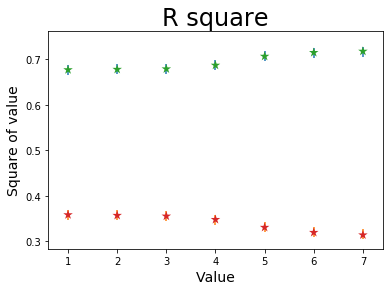

In [77]:
import matplotlib.pyplot as plt
lamda_list=np.array([20, 15, 10, 1, 0.1, 0.01, 0.001])
x_values = list(range(1,8))
y1_values = R2_1_train
y2_values = R2_1_test
y3_values = R2_2_train
y4_values = R2_2_test
plt.scatter(x_values, y1_values, edgecolor='none', s=100, marker='|')
plt.scatter(x_values, y2_values, edgecolor='none', s=100, marker='|')
plt.scatter(x_values, y3_values, edgecolor='none', s=100, marker='*')
plt.scatter(x_values, y4_values, edgecolor='none', s=100, marker='*')

plt.title("R square", fontsize=24)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Square of value", fontsize=14)


Using the cross validation to select the best parameter

In [256]:

from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl
import pandas as pd
import numpy as np
from numpy import *

from scipy import stats

df1 = pd.read_csv('climate_change_1.txt')
df2 = pd.read_csv('climate_change_2.txt')

# distingush the data as label
df1_temp = df1['Temp']
df2_temp = df2['Temp']
length_1 = len(df1_temp)
length_2 = len(df2_temp)

# distingush the data as feature
df1_x = (df1.loc[:,'MEI':'Aerosols'])
df1_x.insert(0, 'theta0', np.ones(length_1))

df2_x = df2.loc[:,'MEI':'NO']
df2_x.insert(0, 'theta0', np.ones(length_2))

#x,y = np.array(mat(df1_x)), np.array(mat(df1_temp))
x,y = df1_x, df1_temp
x1,y1 = df2_x, df2_temp

lamda_list=np.array([20, 15, 10, 1, 0.1,0.01, 0.001,0.0001])

X_train,X_test,y_train,y_test = train_test_split(x,y ,train_size=0.8)
model = RidgeCV(alphas=lamda_list)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print("The best coef is ",model.coef_)
print("The best intercept is ",model.intercept_)
print("The best lambda is ",model.alpha_)

X_train1,X_test1,y_train1,y_test1 = train_test_split(x1,y1 ,train_size=0.8)
model1 = RidgeCV(alphas=lamda_list)
model1.fit(X_train1, y_train1)
y_predicted1 = model1.predict(X_test1)
print("The best coef is ",model1.coef_)
print("The best intercept is ",model1.intercept_)
print("The best lambda is ",model1.alpha_)

def R_2(y, y1):
    n = len(y)
    y = np.array(y)
    y_ = np.ones(n) * sum(y) / n
    ssr = sum((y1 - y_) ** 2)
    sse = sum((y - y1) ** 2)
    sst = ssr + sse
    return ssr/sst

R1 = R_2(y[246:308],y_predicted)
print("R square of whole set 1 is", R1)
R2 = R_2(y1[246:308],y_predicted1)
print("R square of whole set 2 is", R2)

The best coef is  [ 0.    0.07  0.01 -0.   -0.02 -0.01  0.    0.09 -1.37]
The best intercept is  -113.98920280907107
The best lambda is  0.01
The best coef is  [ 0.    0.07  0.    0.   -0.02 -0.01  0.    0.1  -1.42  0.  ]
The best intercept is  -139.12384947047642
The best lambda is  0.01
R square of whole set 1 is 0.45478611772613814
R square of whole set 2 is 0.47012518592134417


Problem 2 question 4:

Each lambda corresponds to a set of weights. As the lambda increases, the weight gradually decreases. The best parameters are in one of these groups. To quantitatively find the best parameters, cross-validation is also required. 

Print the R square graph, we can se that when lambda=10, it has a larger R square than the lambda<10. And when the lambda>10, the result becomes stable, so to make a better trade off, we select the lamda=10.

The importance of cross validation: We do not have sufficient to do the tests. So in a given modeling sample, take out most of the samples to build a model, leave a small part of the sample to forecast using the model just established, and find the forecast error of this small sample, and record their sum of squares.

Problem 3 question 1:
Steps in stepwise regression analysis:
1. For all factors, the regression equation is introduced one by one according to the degree of its influence on y (partial regression squared)
2. Test all the variables contained in the regression equation at any time to see if they are still significant;
3. Among the remaining unselected factors, select the one that has the greatest effect on y and test its significance;
4. Significant, the equation is introduced, and not significant, the equation is not introduced.

In [78]:
import pandas as pd
import numpy as np
from numpy import *

from scipy import stats

df1 = pd.read_csv('climate_change_1.txt')
df2 = pd.read_csv('climate_change_2.txt')

# split the data into training data and test data
data_split = 2006
df1_train = df1[df1['Year'] <= data_split]
df1_test = df1[df1['Year'] > data_split]
df2_train = df2[df2['Year'] <= data_split]
df2_test = df2[df2['Year'] > data_split]


# distingush the data as label
df1_train_temp = df1_train['Temp']
df1_test_temp = df1_test['Temp']
df2_train_temp = df2_train['Temp']
df2_test_temp = df2_test['Temp']
length_train1 = len(df1_train_temp)
length_test1 = len(df1_test_temp)
length_train2 = len(df2_train_temp)
length_test2 = len(df2_test_temp)


# distingush the data as feature
df1_train_x = df1_train.loc[:,'MEI':'Aerosols']
df1_train_x.insert(0, 'theta0', np.ones(length_train1))
df1_test_x = df1_test.loc[:,'MEI':'Aerosols']
df1_test_x.insert(0, 'theta0', np.ones(length_test1))


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
X_train, X_test, Y_train, Y_test = df1_train_x, df1_test_x, df1_train_temp, df1_test_temp
pca = PCA(n_components=5)
# 对模型进行训练
pca.fit(X_train)
# 返回降维后据
X_train = pca.transform(X_train)

# 使用返回后的数据用线性回归模型进行建模

import statsmodels.api as sm
ols = sm.OLS(Y_train, X_train).fit()
ols.summary()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     17.04
Date:                Thu, 26 Dec 2019   Prob (F-statistic):           1.06e-14
Time:                        20:08:09   Log-Likelihood:                -29.537
No. Observations:                 284   AIC:                             69.07
Df Residuals:                     279   BIC:                             87.32
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0016      0.000     -7.778      0.000      -0.002      -0.001
x2            -0.0041      0.001     -3.520      0.001      -0.006      -0.002
x3             0.0054      0.002      2.585      0.010       0.001       0.010
x4            -0.0034      0.007     -0.510      0.611      -0.016       0.010
x5             0.0406      0.018      2.314      0.021       0.006       0.075
==============================================================================
Omnibus:                        5.383   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.851
Skew:                           0.206   Prob(JB):                       0.0536
Kurtosis:                       3.570   Cond. No.                         83.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Problem 3 question 2:

    When we use the PCA to contain only 5 variables, The answer is better. Because the most parameters are significant.
    

Problem 4:
    $$θj=θj-α\frac{\partial J(θ0, θ1)}{\partial θj}$$

In [79]:
from random import random


def gradientDescent(fn, partial_derivatives, n_variables, lr=0.1,
                    max_iter=10000, tolerance=1e-5):
    theta = [random() for _ in range(n_variables)]
    y_cur = fn(*theta)
    for i in range(max_iter):
        # Calculate gradient of current theta.
        gradient = [f(*theta) for f in partial_derivatives]
        # Update the theta by the gradient.
        for j in range(n_variables):
            theta[j] -= gradient[j] * lr
        # Check if converged or not.
        y_cur, y_pre = fn(*theta), y_cur
        if abs(y_pre - y_cur) < tolerance:
            break
    return theta, y_cur

def f(x, y):
    return (x + y - 3) ** 2 + (x + 2 * y - 5) ** 2 + 2


def df_dx(x, y):
    return 2 * (x + y - 3) + 2 * (x + 2 * y - 5)


def df_dy(x, y):
    return 2 * (x + y - 3) + 4 * (x + 2 * y - 5)

def main():
    print("Solve the minimum value of quadratic function:")
    n_variables = 2
    theta, f_theta = gradientDescent(f, [df_dx, df_dy], n_variables)
    theta = [round(x, 3) for x in theta]
    print("The solution is: theta %s, f(theta) %.2f.\n" % (theta, f_theta))
    
main()

Solve the minimum value of quadratic function:
The solution is: theta [0.987, 2.008], f(theta) 2.00.



In [262]:
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradDescent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)             #convert to NumPy matrix
    labelMat = mat(classLabels).transpose() #convert to NumPy matrix
    m,n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights - alpha * dataMatrix.transpose()* error #matrix mult
    return weights

g1=gradDescent(x,y)
g2=gradDescent(x1,y1)
print(g1)
print(g2)

def R_2(x, y, theta_):
    n = len(y)
    f = reshape(np.array(mat(x) @ theta_), n)
    y = np.array(y)
    y_ = np.ones(n) * sum(y) / n
    ssr = sum((f - y_) ** 2)
    sse = sum((y - f) ** 2)
    sst = ssr + sse
    return ssr/sst


R_2_train1 = R_2(df1_train_x, df1_train_temp, g1)
R_2_test1 = R_2(df1_test_x, df1_test_temp, g1)
print("R square of train set 1 is", R_2_train1)
print("R square of test set 1 is", R_2_test1)

R_2_train2 = R_2(df2_train_x, df2_train_temp, g2)
R_2_test2 = R_2(df2_test_x, df2_test_temp, g2)
print("R square of train set 2 is", R_2_train2)
print("R square of test set 2 is", R_2_test2)
print("-----------")

# write a t-test to do the significance test
def t_test(x,y,theta_,p):
    n = len(y)
    f = reshape(np.array(mat(x) @ theta_),n)
    y = np.array(y)
    xTx = mat(x).T @ mat(x)
    #a, b = np.linalg.eig(xTx) # k = max(a) / min(a)
    xTxI = xTx.I
    xTxI = np.array(xTxI)
    p1=p+1
    c=np.zeros(p1)
    for jj in range(p1):
        c[jj] = xTxI[jj][jj]
    sse = sum((y - f) ** 2)
    sigma_h = sqrt(sse/(n-p1))
    t = np.zeros(p1)
    pv = np.zeros(p1)
    pv1 = np.zeros(p1)
    for i in range(p1):
        t[i] = theta_[i] / sigma_h / sqrt(c[i])
        pv[i] = 2 *(stats.t.sf(np.abs(t[i]),n-p1)) 
        #pv1[i]= 2*(1-stats.t.cdf(np.abs(t[i]),n-p1)) #just make a validation, it means the same with the last line
        #The former mistake is from the absolute of t value
    return t, pv, np.linalg.matrix_rank(xTx) #pv1

test1 = t_test(df1_train_x, df1_train_temp,g1,8)
print("For climate_change_1: \n", "t value is: \n", test1[0], "\n p value is: \n", test1[1], "\n rank is: \n",test1[2],"\n-----------")
test2 = t_test(df2_train_x, df2_train_temp,g2,9)
print("For climate_change_2: \n", "t value is: \n", test2[0], "\n p value is: \n", test2[1], "\n rank is: \n",test2[2],"\n-----------")



[[   115.46]
 [    29.05]
 [ 41314.43]
 [199393.99]
 [ 35649.52]
 [ 28629.55]
 [ 55850.75]
 [156354.68]
 [     3.22]]
[[   115.46]
 [    29.05]
 [ 41314.43]
 [199393.99]
 [ 35649.52]
 [ 28629.55]
 [ 55850.75]
 [156354.68]
 [     3.22]
 [   314.85]]
R square of train set 1 is 0.5000000000021962
R square of test set 1 is 0.49999999999994876
R square of train set 2 is 0.5000000000021962
R square of test set 2 is 0.49999999999994876
-----------
For climate_change_1: 
 t value is: 
 [0.   0.   0.   0.06 0.   0.   0.01 0.   0.  ] 
 p value is: 
 [1.   1.   1.   0.96 1.   1.   0.99 1.   1.  ] 
 rank is: 
 9 
-----------
For climate_change_2: 
 t value is: 
 [0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.  ] 
 p value is: 
 [1.   1.   1.   1.   1.   1.   0.99 1.   1.   1.  ] 
 rank is: 
 9 
-----------


The answer is better in gradient descent case.